In [ ]:
from matplotlib import pyplot
from networkx   import draw_networkx
from numpy      import array, average
from os         import path
from time       import time

import pyfastg

# Load pyfastg-oop
from reader_fastg   import Fastg_reader
from writer_fastg   import Fastg_writer
from assembly_graph import Assembly_graph

# Examplary assembly graphs generated with SPAdes from RNAseq data
test_data_path   = path.join(".", 'test_data') 
c_elegans_fastg  = path.join(test_data_path, 'elegans_assembly_graph.fastg')
m_musculus_fastg = path.join(test_data_path, 'musculus_assembly_graph.fastg')

c_elegans_fastg  = r"C:\Users\simon\OneDrive\Desktop\Assembly\Ivoforms_assembler\elegans_assembly_graph.fastg"
m_musculus_fastg = r"C:\Users\simon\OneDrive\Desktop\Assembly\Ivoforms_assembler\musculus_assembly_graph.fastg"

# Pyfastg-oop

Pyfastg-oop is an object oriented programming version of pyfastg.

This makes it easier to extend pyfastg-oop, as demonstrated by some of the functionalities that have already been added.

## 1 Interfacing the file system with reader and writer objects

### 1.1 Reading

In [2]:
reader = Fastg_reader()
pyfastg_oop_c_elegans_data = reader.parse_fastg(c_elegans_fastg)

display(pyfastg_oop_c_elegans_data)

name,length,coverage,sequence,neighbors
str,i64,f64,str,list[str]
"""1994705-""",132,1.515464,"""GCTTTGATCTCGAT…",[]
"""1674463-""",184,1.275168,"""GTGAATCTATTCGG…",[]
"""1748374-""",190,1.748387,"""GCTGCTAATGTTGA…",[]
"""2574243+""",176,2.319149,"""AATTTTTTTAACTT…",[]
"""3277+""",153,1.016949,"""TTCTTCGATGCACT…",[]
…,…,…,…,…
"""1694236+""",129,1.606383,"""AAACCCATACAAGA…",[]
"""2474086+""",352,2.283912,"""GTGACACCACGATG…",[]
"""3071227-""",124,1.348315,"""CAAGTTATTATGTT…",[]


### 1.2 Writing

In [3]:
writer = Fastg_writer()
writer.write(pyfastg_oop_c_elegans_data, "pyfastg_oop_c_elegans_copy.fastg")

## 2 The Assembly_graph class

Objects of the Assembly_graph class can be initialized from the polars.DataFrames provided by readers objects.

In [4]:
pyfastg_oop_c_elegans_graph = Assembly_graph(pyfastg_oop_c_elegans_data)

### 2.1 Inheritance

The Assembly_graph class inherits from networkx.DiGraph as assembly graphs are directed graphs.

### 2.2 Analyzing components using Assembly_graph.component_graphs()

Assembly_graph.component_graphs() returns a generator. The generator outputs the components sorted by node number in descending order<br>
Each element in this list is itself of type Assembly_graph. We can use this to visualize or store components of the assembly graph individually.

name,length,coverage,sequence,neighbors
str,i64,f64,str,list[str]
"""3255629-""",933,13.891982,"""GTGATTTACTAAAT…","[""3062433+"", ""781566+""]"
"""1870993+""",36,10.0,"""CCTCTTCGAAGAAA…","[""3419127+""]"
"""777090-""",324,2.539792,"""ATTACCAGAAAAGA…","[""1870993+""]"
"""781566+""",1641,7.825654,"""CTGCGTCATCCTGG…","[""2956836+"", ""777088-""]"
"""3062433+""",184,5.919463,"""CTGCGTCATCCTGG…",[]
"""3419127+""",370,12.146269,"""CTCTTCGAAGAAAG…",[]
"""777088-""",175,9.428571,"""AAGACGTTCCCGTT…","[""1870993+""]"
"""2956836+""",191,2.147436,"""AAGACGTTCCCGTT…","[""3419127+""]"


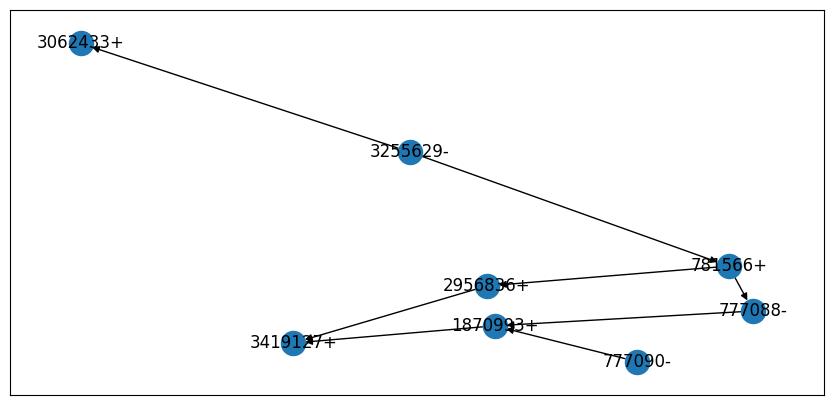

In [5]:
component_generator = pyfastg_oop_c_elegans_graph.component_graphs()

component_index = 66

for i in range(component_index):
    component  = next(component_generator)

fig, axes = pyplot.subplots(figsize=(10.5,5))

display(component.assembly_data)
draw_networkx(component)

## 3 Correctness

Loading an assembly graph with pyfastg-oop should yield the same result as with regular pyfastg.

In [6]:
def graphs_equal(graph_1, graph_2):

    nodes_equal = bool(sorted(graph_1.nodes())==sorted(graph_2.nodes()))
    edges_equal = bool(sorted(graph_1.edges())==sorted(graph_2.edges()))

    return (nodes_equal and edges_equal)

In [7]:
pyfastg_c_elegans_graph = pyfastg.parse_fastg(c_elegans_fastg)

print(graphs_equal(pyfastg_c_elegans_graph, pyfastg_c_elegans_graph))

True


Loading an assembly graph, writing it to a new file and loading the copy should also result in the same graph.

In [8]:
pyfastg_oop_c_elegans_copy_data  = reader.parse_fastg("pyfastg_oop_c_elegans_copy.fastg")
pyfastg_oop_c_elegans_copy_graph = Assembly_graph(pyfastg_oop_c_elegans_copy_data)

print(graphs_equal(pyfastg_oop_c_elegans_graph, pyfastg_oop_c_elegans_copy_graph))

True


## 4 Speed comparison

Regular pyfastg is not inconviniently slow. However, I noticed that pyfast-oop loads assembly graphs slightly faster (usually around 25%).<br>

This is because in pyfastg-oop list comprehensions are prefered over regular for loops with list.append()<br>
(Explanation: https://www.youtube.com/watch?v=U88M8YbAzQk)<br>

Test loading C:\Users\simon\OneDrive\Desktop\Assembly\Ivoforms_assembler\elegans_assembly_graph.fastg
Iteration 1/10 completed
Iteration 2/10 completed
Iteration 3/10 completed
Iteration 4/10 completed
Iteration 5/10 completed
Iteration 6/10 completed
Iteration 7/10 completed
Iteration 8/10 completed
Iteration 9/10 completed
Iteration 10/10 completed
Test loading C:\Users\simon\OneDrive\Desktop\Assembly\Ivoforms_assembler\musculus_assembly_graph.fastg
Iteration 1/10 completed
Iteration 2/10 completed
Iteration 3/10 completed
Iteration 4/10 completed
Iteration 5/10 completed
Iteration 6/10 completed
Iteration 7/10 completed
Iteration 8/10 completed
Iteration 9/10 completed
Iteration 10/10 completed


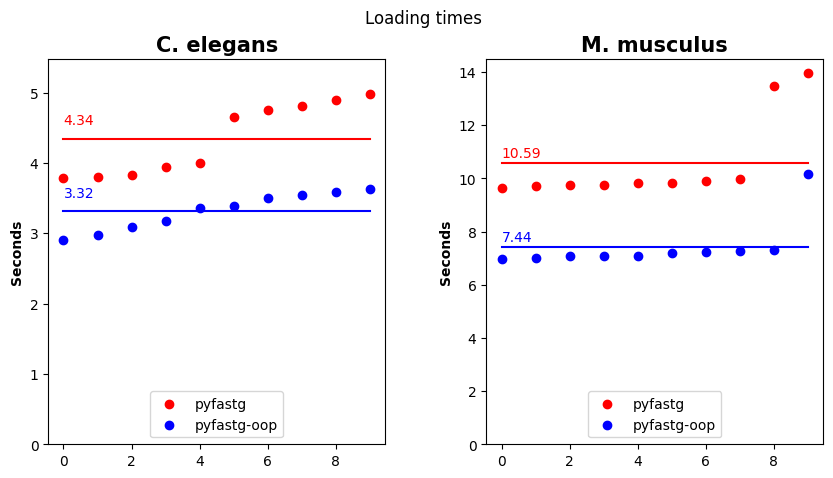

In [10]:
def configured_plot():

    fig, axes = pyplot.subplots(1,2, figsize=(10,5))

    fig.suptitle("Loading times")
    axes[0].set_title("C. elegans", fontweight="bold", fontsize=15)
    axes[1].set_title("M. musculus", fontweight="bold", fontsize=15)

    for ax in axes:
        ax.set_ylabel('Seconds', fontweight="bold")
    
    pyplot.subplots_adjust(wspace=0.3)

    return fig, axes

def plot_durations(durations, ax, color, label):

    x = [i for i in range(len(durations))]
    a = average(durations) # The average duration

    ax.scatter(x, sorted(durations), label=label, color=color)
    ax.plot([0,len(durations)-1], [a,a] , color=color)
    ax.text(0, a+0.2, str(round(a,2)), color=color)
    ax.set_ylim(ymin=0, ymax=array(durations_pyfastg+durations_pyfastg).max()+0.5)
    ax.legend(loc='lower center')

def load_with_pyfastg(file):
    pyfastg.parse_fastg(file)

def load_with_pyfastg_oop(file):
    Assembly_graph(Fastg_reader().parse_fastg(file))

def time_test(method, file):
    start = time()
    method(file)
    return time()-start

fig, axes       = configured_plot()
test_iterations = 10

for i, file in enumerate([c_elegans_fastg, m_musculus_fastg]):

    durations_pyfastg     = []
    durations_pyfastg_oop = []

    print(f'Test loading {file}')

    for j in range(test_iterations):
      
        durations_pyfastg.append(time_test(load_with_pyfastg, file))
        durations_pyfastg_oop.append(time_test(load_with_pyfastg_oop, file))

        print(f'Iteration {j+1}/{test_iterations} completed')

    plot_durations(durations_pyfastg, axes[i], "red", "pyfastg")
    plot_durations(durations_pyfastg_oop, axes[i], "blue", "pyfastg-oop")
    